In [96]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter


#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#train test split
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS


#ML models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import Lasso
#default theme and settings
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
pd.options.display.max_columns

#warning hadle
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [97]:
# read in csv file as a DataFrame
tr_df = pd.read_csv("D:\Bigmart sales prediction\dataset\Train.csv")
# explore the first 5 rows
tr_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [98]:
# read in csv file as a DataFrame
te_df = pd.read_csv("D:\Bigmart sales prediction\dataset\Test.csv")
# explore the first 5 rows
te_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [99]:
print(f"training set (row, col): {tr_df.shape}\n\ntesting set (row, col): {te_df.shape}")

training set (row, col): (8523, 12)

testing set (row, col): (5681, 11)


In [100]:
#column information
tr_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [101]:
#summary statistics test
te_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [102]:
#summary statistics train
tr_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [103]:
#missing values in decsending order
print("Train:\n")
print(tr_df.isnull().sum().sort_values(ascending=False),"\n\n",tr_df.isnull().sum()/tr_df.shape[0] *100,"\n\n")
print("Test:\n")
print(te_df.isnull().sum().sort_values(ascending=False),"\n\n",te_df.isnull().sum()/te_df.shape[0] *100,"\n\n")

Train:

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 

 Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64 


Test:

Outlet_Size                  1606
Item_Weight                   976
Item_Id

In [104]:
print("Outlet_Size:\n", tr_df.Outlet_Size.value_counts(), "\n\n")
print("Item_Weight:\n", tr_df.Item_Weight.value_counts(), "\n\n")

Outlet_Size:
 Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 


Item_Weight:
 12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64 




In [105]:
print("test mode, train mode\n",[tr_df['Outlet_Size'].mode().values[0], te_df['Outlet_Size'].mode().values[0]])

test mode, train mode
 ['Medium', 'Medium']


In [106]:
#train
tr_df['Outlet_Size'] = tr_df['Outlet_Size'].fillna(
tr_df['Outlet_Size'].dropna().mode().values[0])

#test
te_df['Outlet_Size'] = te_df['Outlet_Size'].fillna(
te_df['Outlet_Size'].dropna().mode().values[0])

#checking if we filled missing values
tr_df['Outlet_Size'].isnull().sum(),te_df['Outlet_Size'].isnull().sum()

(0, 0)

Text(0.5, 1.0, 'Item_Weight Boxplot')

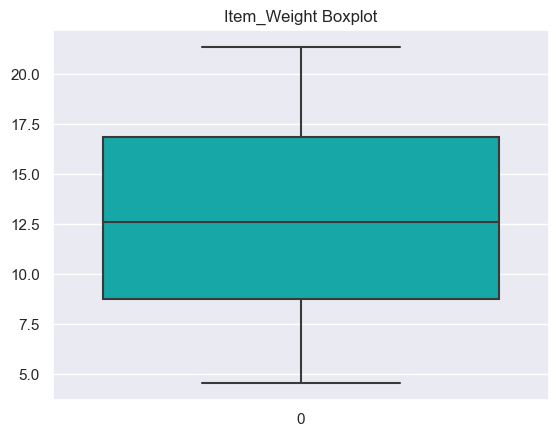

In [107]:
# I personally prefer a vertical view and a cyan color
sns.boxplot(data=tr_df['Item_Weight'],orient="v", color = 'c')
plt.title("Item_Weight Boxplot")

In [108]:
#train
tr_df['Item_Weight'] = tr_df['Item_Weight'].fillna(
tr_df['Item_Weight'].dropna().mean())

#test
te_df['Item_Weight'] = te_df['Item_Weight'].fillna(
te_df['Item_Weight'].dropna().mean())

#checking if we filled missing values
tr_df['Item_Weight'].isnull().sum(),te_df['Item_Weight'].isnull().sum()

(0, 0)

In [109]:
print("train:\n")
print(tr_df.info())
print("\n\ntest:\n")
print(te_df.info())

train:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


test:

<class 'pandas.core.fra

In [110]:
#list of all the numeric columns
num = tr_df.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = tr_df.select_dtypes('object').columns.to_list()

#numeric df
BM_num =  tr_df[num]
#categoric df
BM_cat = tr_df[cat]

#print(num)
#print(cat)


In [111]:
#train
tr_df['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],
                                  ['Low Fat','Low Fat','Regular'],inplace = True)
#test
te_df['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],
                                  ['Low Fat','Low Fat','Regular'],inplace = True)

#check result
tr_df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [112]:
tr_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [113]:
#creating our new column for both datasets
tr_df['Outlet_Age'], te_df['Outlet_Age']= tr_df['Outlet_Establishment_Year'].apply(lambda year: 2020 - year), te_df['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)

##uncomment to check result
#tr_df['Outlet_Age'].head
#te_df['Outlet_Age'].head

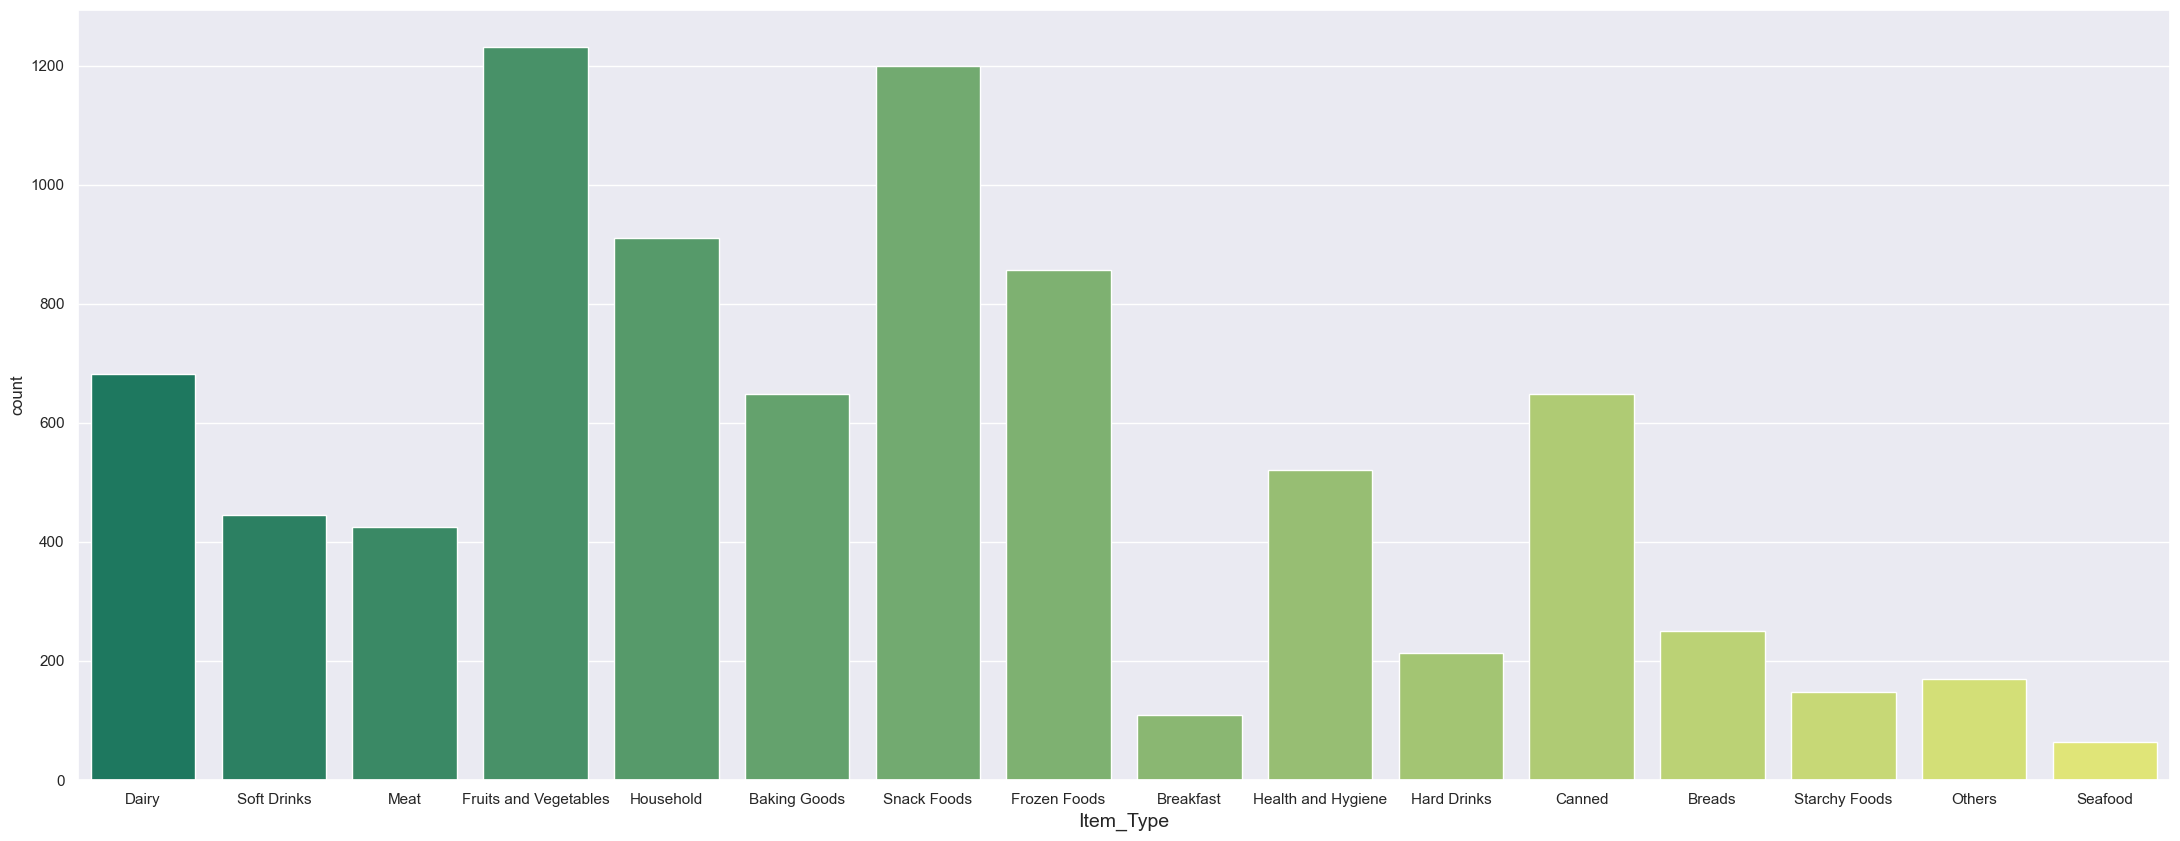

In [114]:
plt.figure(figsize=(27,10))
sns.countplot(x='Item_Type' , data=tr_df ,palette='summer')
plt.xlabel('Item_Type', fontsize=14)
plt.show()

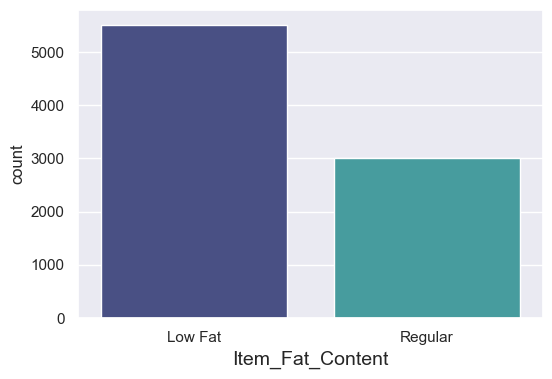

In [115]:
#categorical columns:
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content' , data=tr_df ,palette='mako')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

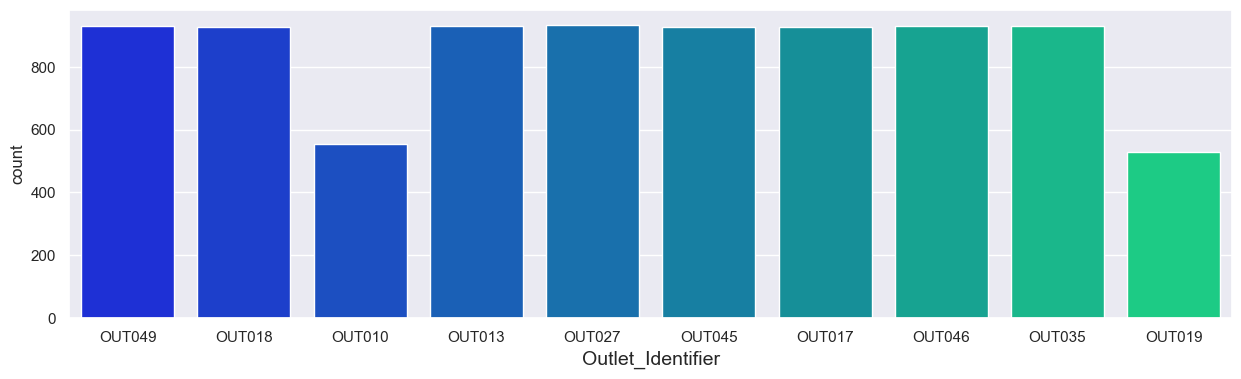

In [116]:
plt.figure(figsize=(15,4))
sns.countplot(x='Outlet_Identifier' , data=tr_df ,palette='winter')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.show()

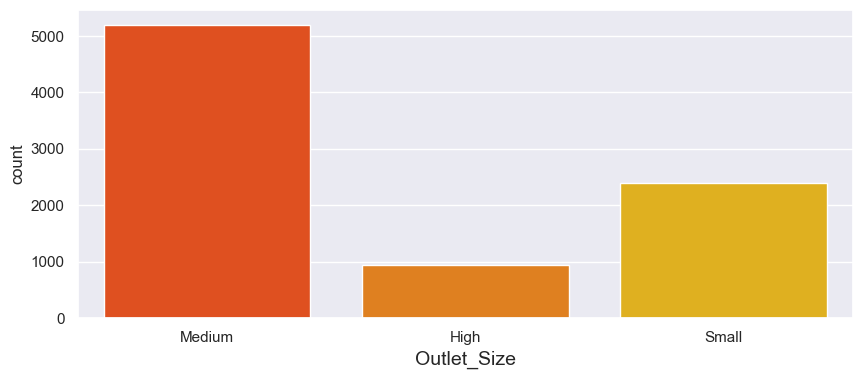

In [117]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Size' , data=tr_df ,palette='autumn')
plt.xlabel('Outlet_Size', fontsize=14)
plt.show()

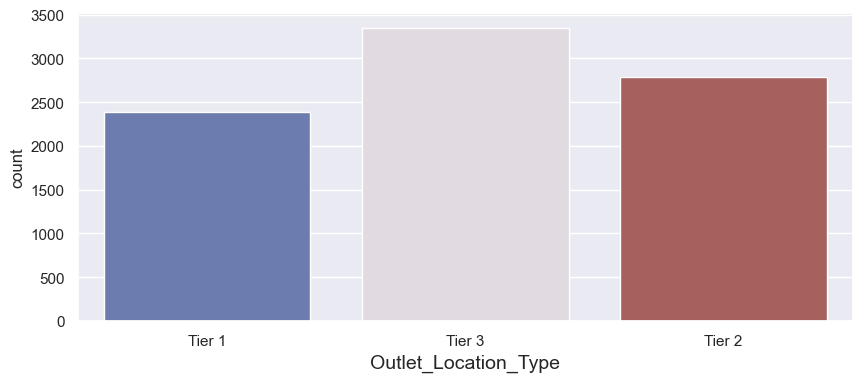

In [118]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Location_Type' , data=tr_df ,palette='twilight_shifted')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.show()

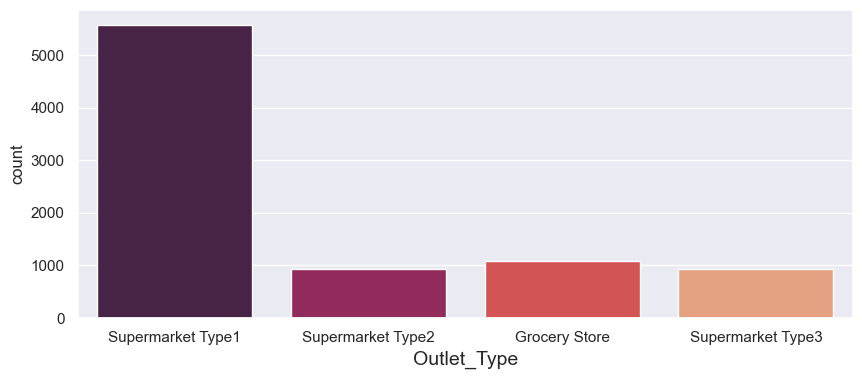

In [119]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Type' , data=tr_df ,palette='rocket')
plt.xlabel('Outlet_Type', fontsize=14)
plt.show()

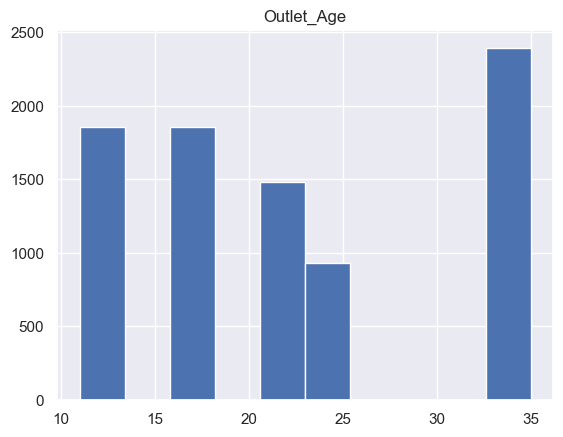

In [120]:
#list of all the numeric columns
num = tr_df.select_dtypes('number').columns.to_list()
#numeric df
BM_num =  tr_df[num]

plt.hist(tr_df['Outlet_Age'])
plt.title("Outlet_Age")
plt.show()

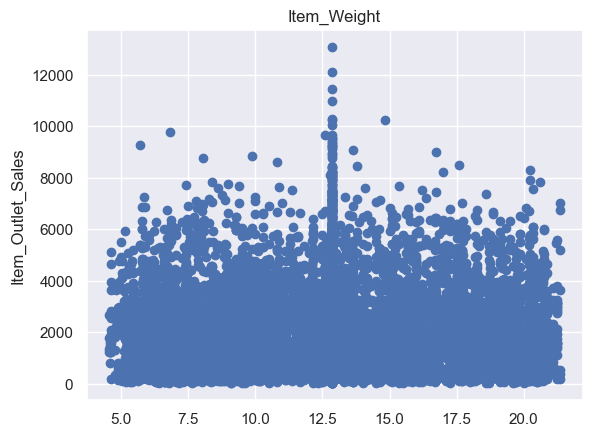

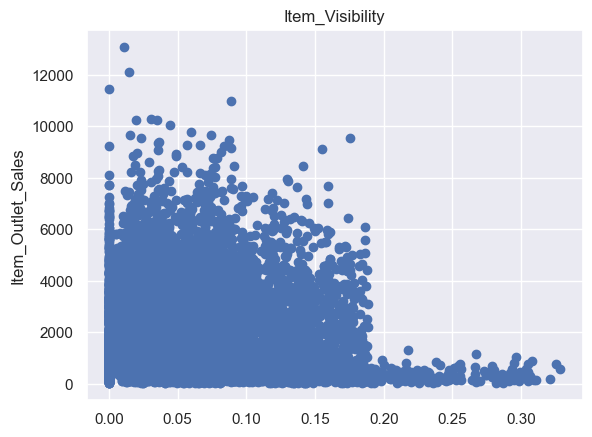

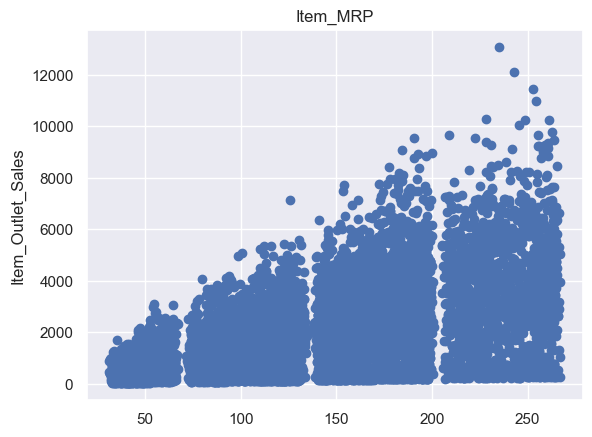

In [121]:
#because of the variability of the unique values of the numeric columns a scatter plot with the target value will be of use
for numeric in BM_num[num[:3]]:
    plt.scatter(BM_num[numeric], BM_num['Item_Outlet_Sales'])
    plt.title(numeric)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

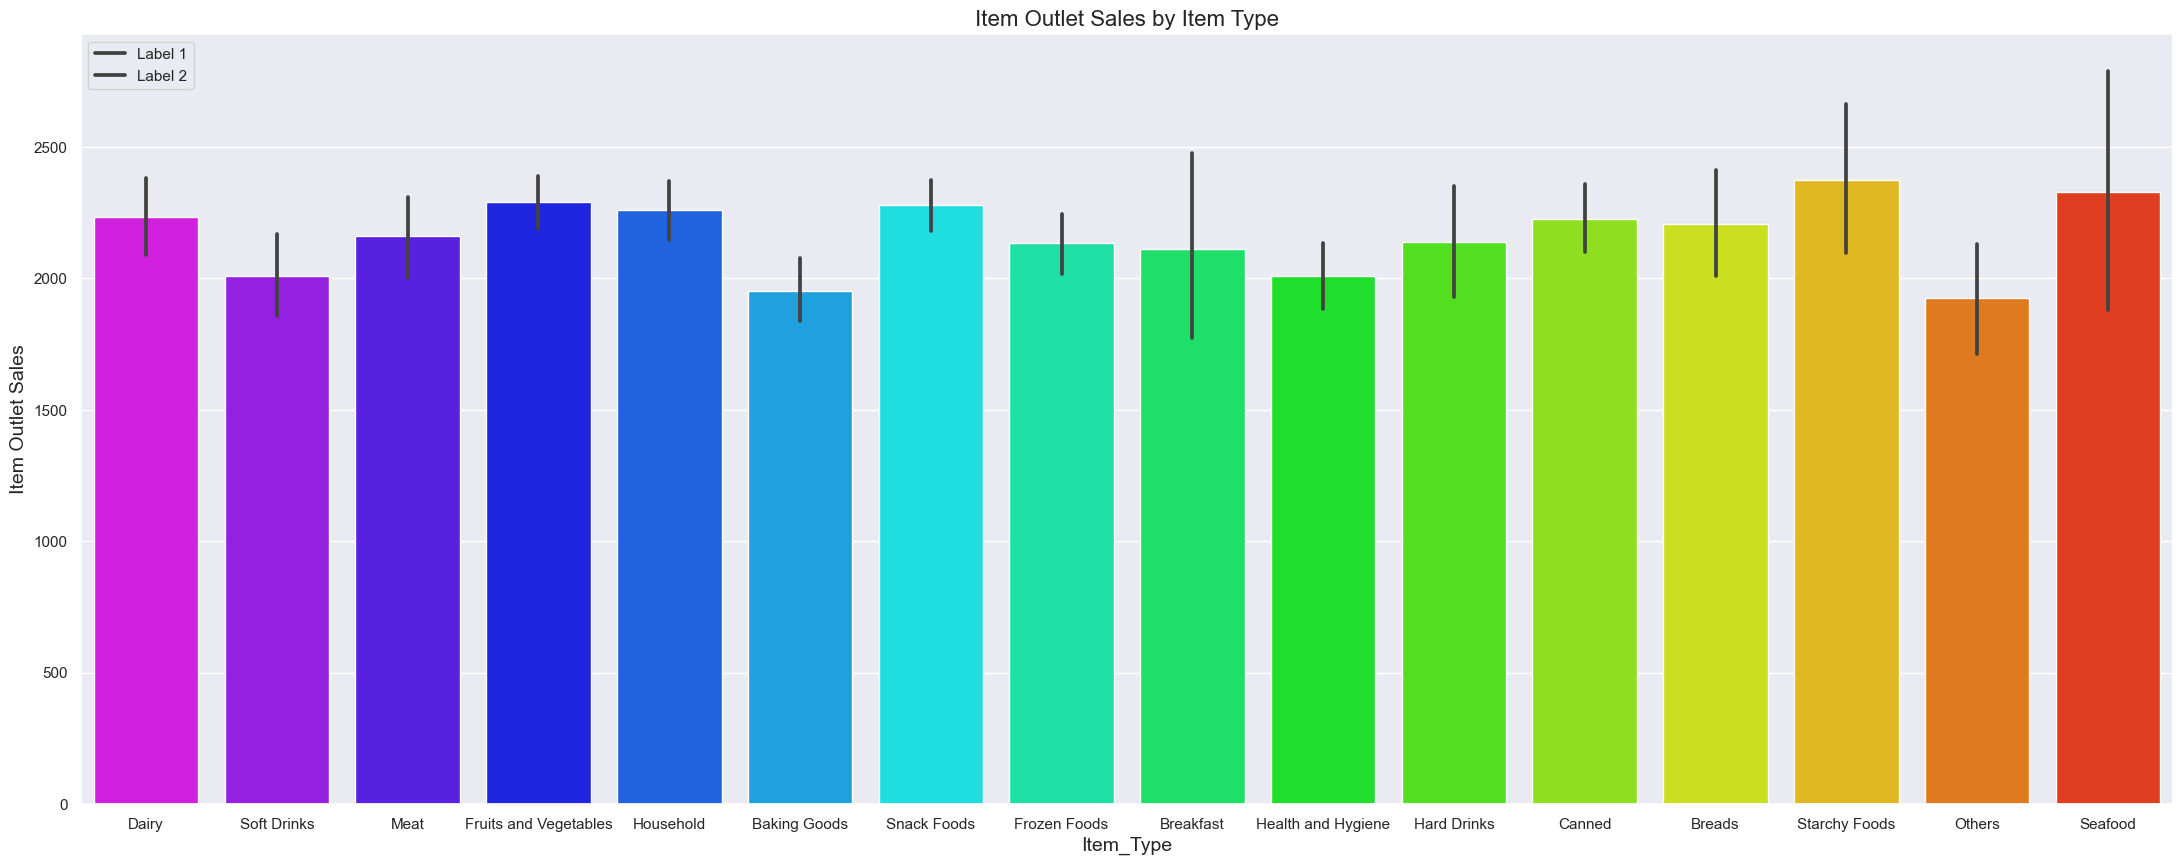

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(27, 10))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=tr_df, palette='gist_rainbow_r')
plt.xlabel('Item_Type', fontsize=14)
plt.ylabel('Item Outlet Sales', fontsize=14) 
plt.title('Item Outlet Sales by Item Type', fontsize=16)  
plt.legend(labels=['Label 1', 'Label 2'])

plt.show()


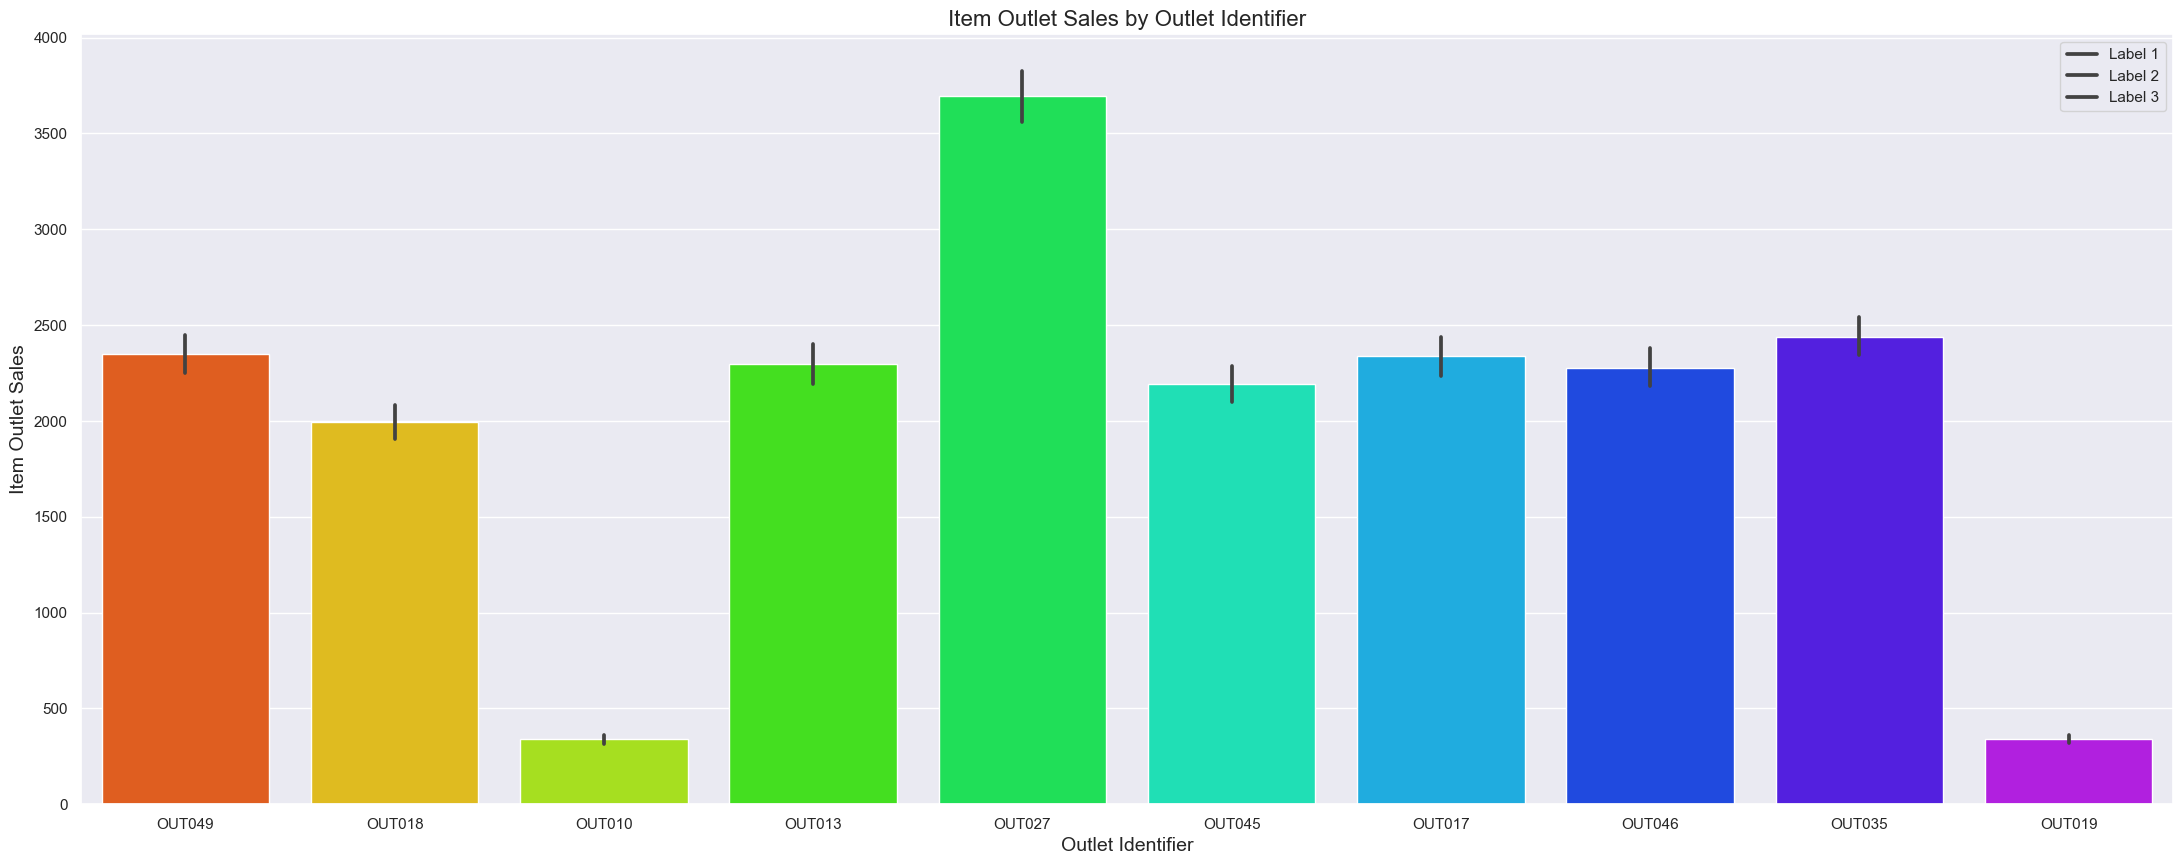

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(27, 10))
sns.barplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=tr_df, palette='gist_rainbow')
plt.xlabel('Outlet Identifier', fontsize=14)
plt.ylabel('Item Outlet Sales', fontsize=14)
plt.title('Item Outlet Sales by Outlet Identifier', fontsize=16)


plt.legend(labels=['Label 1', 'Label 2', 'Label 3']) 

plt.show()


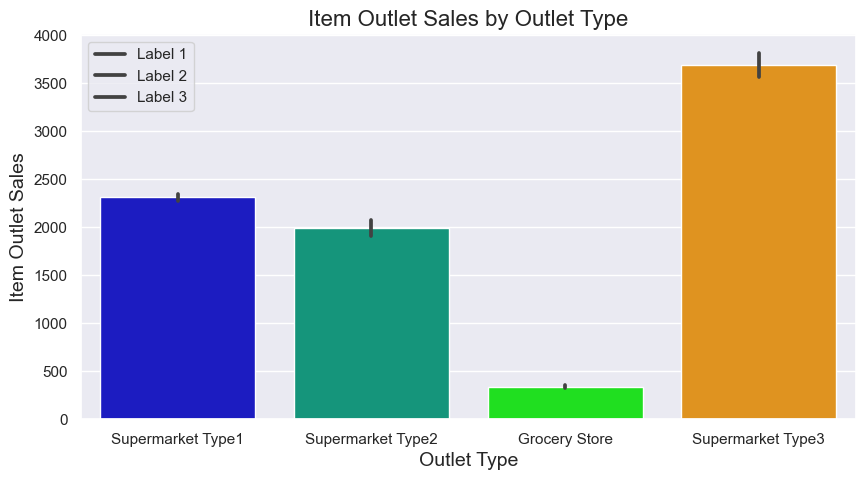

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=tr_df, palette='nipy_spectral')
plt.xlabel('Outlet Type', fontsize=14)
plt.ylabel('Item Outlet Sales', fontsize=14)
plt.title('Item Outlet Sales by Outlet Type', fontsize=16)


plt.legend(labels=['Label 1', 'Label 2', 'Label 3'])  

plt.show()


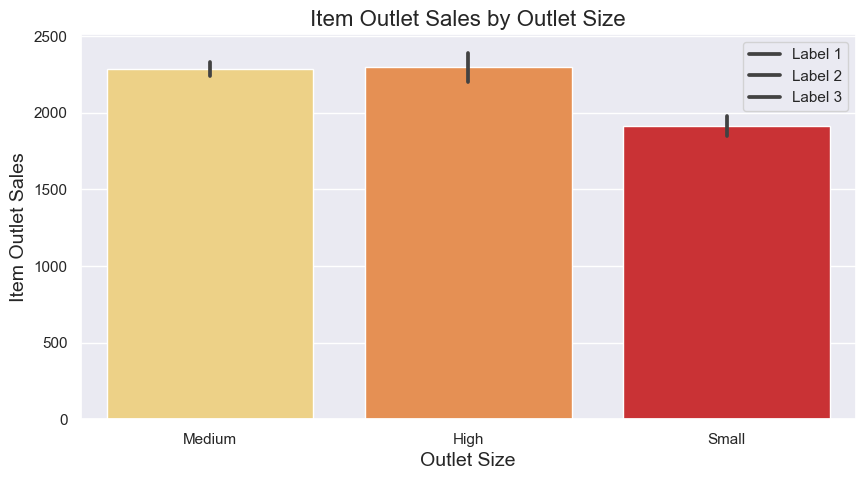

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=tr_df, palette='YlOrRd')
plt.xlabel('Outlet Size', fontsize=14)
plt.ylabel('Item Outlet Sales', fontsize=14)
plt.title('Item Outlet Sales by Outlet Size', fontsize=16)


plt.legend(labels=['Label 1', 'Label 2', 'Label 3']) 

plt.show()


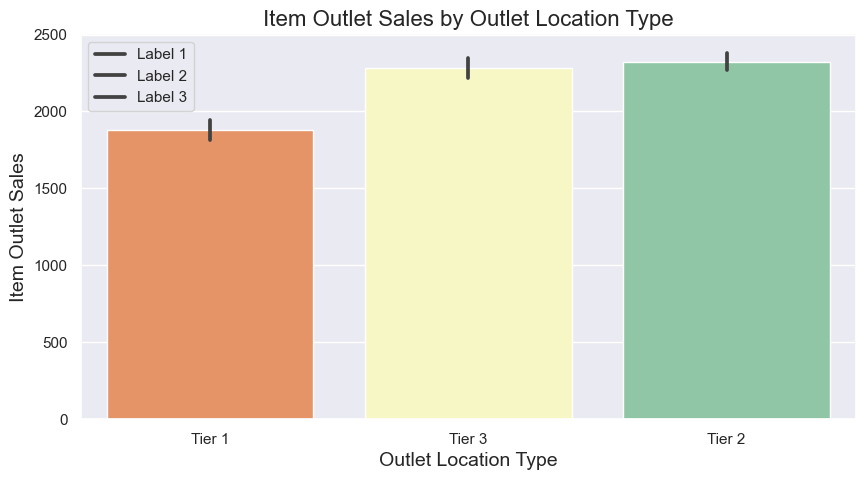

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=tr_df, palette='Spectral')
plt.xlabel('Outlet Location Type', fontsize=14)
plt.ylabel('Item Outlet Sales', fontsize=14)
plt.title('Item Outlet Sales by Outlet Location Type', fontsize=16)

plt.legend(labels=['Label 1', 'Label 2', 'Label 3'])  

plt.show()


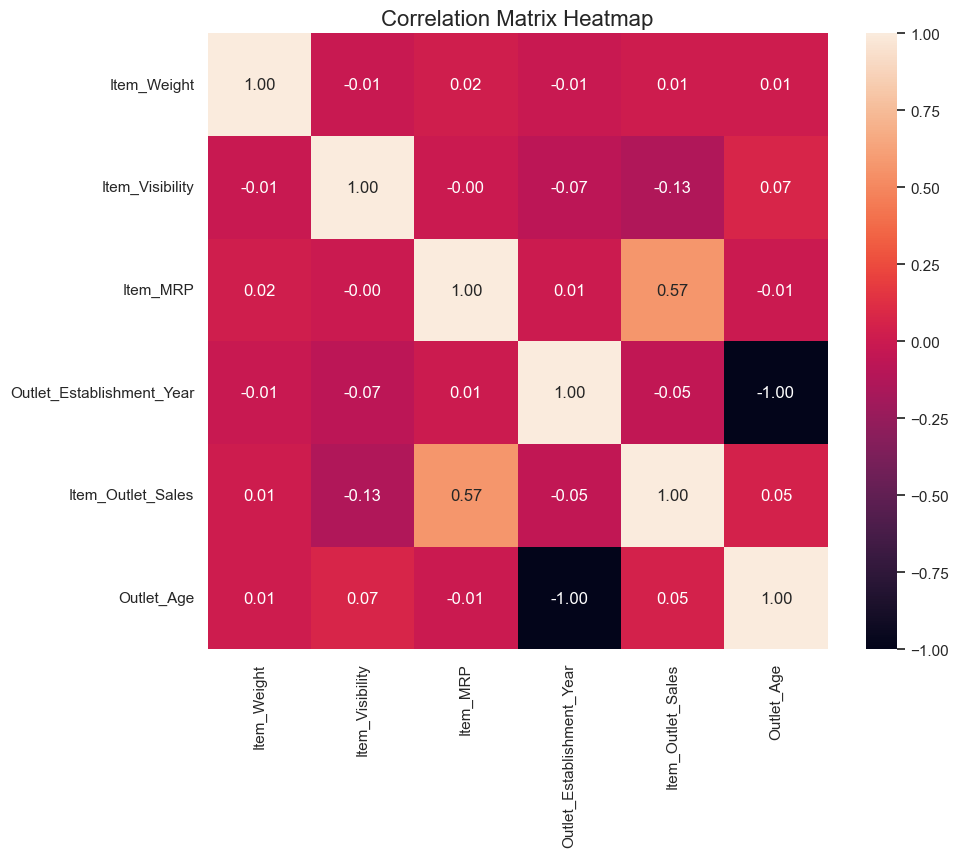

In [127]:

numeric_columns = tr_df.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='rocket', annot=True, fmt='.2f')
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()


In [128]:
#lable encoding

le = LabelEncoder()
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for i in Label:
    tr_df[i] = le.fit_transform(tr_df[i])
    te_df[i] = le.fit_transform(te_df[i])

tr_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,21
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,11
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,21
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,22
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,33


In [129]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Define the columns to be one-hot encoded
cols = ['Item_Type', 'Outlet_Type']

# Create an instance of the OneHotEncoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Fit and transform the specified columns for both training and test data
tr_oh = OH_encoder.fit_transform(tr_df[cols])
te_oh = OH_encoder.transform(te_df[cols])

# Get the categories generated by the OneHotEncoder
categories = OH_encoder.categories_

# Create feature names for the one-hot encoded columns
feature_names = []
for col, cats in zip(cols, categories):
    feature_names.extend([f'{col}_{cat}' for cat in cats])

# Create DataFrames from the one-hot encoded arrays and set column names
tr_oh_df = pd.DataFrame(tr_oh, columns=feature_names)
te_oh_df = pd.DataFrame(te_oh, columns=feature_names)

# Add one-hot encoded columns back to the original DataFrames
tr_fe = pd.concat([tr_df, tr_oh_df], axis=1)
te_fe = pd.concat([te_df, te_oh_df], axis=1)

In [130]:
# Dropping irrelevant columns

tr_fe  = tr_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)
te_fe = te_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

In [131]:
tr_fe.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,21,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5.92,1,0.019278,48.2692,1,2,443.4228,11,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,21,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,19.20,1,0.000000,182.0950,1,2,732.3800,22,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,8.93,0,0.000000,53.8614,0,2,994.7052,33,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [132]:
y = tr_fe['Item_Outlet_Sales']
X = tr_fe.drop('Item_Outlet_Sales', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

In [133]:
def cross_val(model_name,model,X,y,cv):

    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Create a Linear Regression model
LR = LinearRegression()

# Fit the model
LR.fit(X_train, y_train)

# Predict on the test set
y_predict = LR.predict(X_test)

# Calculate evaluation metrics
LR_MAE = round(mean_absolute_error(y_test, y_predict), 2)
LR_MSE = round(mean_squared_error(y_test, y_predict), 2)
LR_R2 = round(r2_score(y_test, y_predict), 4)

# Print evaluation metrics
print(f"Mean Absolute Error: {LR_MAE}")
print(f"Mean Squared Error: {LR_MSE}")
print(f"R^2 Score: {LR_R2}")

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Perform cross-validation
cross_val_scores = cross_val_score(LR, X_normalized, y, cv=5)
LR_CV = round(cross_val_scores.mean(), 4)

print(f"Cross-Validation Score: {LR_CV}")


Mean Absolute Error: 838.19
Mean Squared Error: 1285793.54
R^2 Score: 0.5593
Cross-Validation Score: 0.5579


In [135]:
#model
RFR= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)
#fit
RFR.fit(X_train, y_train)
#predict
y_predict = RFR.predict(X_test)

#score variables
RFR_MAE = round(MAE(y_test, y_predict),2)
RFR_MSE = round(MSE(y_test, y_predict),2)
RFR_R_2 = round(R2(y_test, y_predict),4)
RFR_CS  = round(CVS(RFR, X, y, cv=5).mean(),4)



print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")
cross_val(RFR,RandomForestRegressor(),X,y,5)

 Mean Absolute Error: 1030.27

 Mean Squared Error: 1964025.66

 R^2 Score: 0.3268

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) Scores:
0.57
0.53
0.52
0.56
0.57
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) score: 0.5502


In [136]:
#model
LS = Lasso(alpha = 0.05)
#fit
LS.fit(X_train,y_train)

#predict
y_predict = LS.predict(X_test)

#score variables
LS_MAE = round(MAE(y_test, y_predict),2)
LS_MSE = round(MSE(y_test, y_predict),2)
LS_R_2 = round(R2(y_test, y_predict),4)
LS_CS  = round(CVS(LS, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LS_MAE}\n")
print(f" Mean Squared Error: {LS_MSE}\n")
print(f" R^2 Score: {LS_R_2}\n")
cross_val(LS,Lasso(alpha = 0.05),X,y,5)

 Mean Absolute Error: 838.07

 Mean Squared Error: 1285554.86

 R^2 Score: 0.5594

Lasso(alpha=0.05) Scores:
0.57
0.55
0.55
0.56
0.56
Average Lasso(alpha=0.05) score: 0.5581


In [137]:
# loading iris dataset 
iris = load_iris() 
X = iris.data[:, :4] 
Y = iris.target 

# train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, 
													Y, 
													test_size = 0.20, 
													random_state = 42) 

# group / ensemble of models 
estimator = [] 
estimator.append(('LR', 
				LogisticRegression(solver ='lbfgs', 
									multi_class ='multinomial', 
									max_iter = 200))) 
estimator.append(('SVC', SVC(gamma ='auto', probability = True))) 
estimator.append(('DTC', DecisionTreeClassifier())) 

# Voting Classifier with hard voting 
vot_hard = VotingClassifier(estimators = estimator, voting ='hard') 
vot_hard.fit(X_train, y_train) 
y_pred = vot_hard.predict(X_test) 

# using accuracy_score metric to predict accuracy 
score = accuracy_score(y_test, y_pred) 
print("Hard Voting Score % d" % score) 

# Voting Classifier with soft voting 
vot_soft = VotingClassifier(estimators = estimator, voting ='soft') 
vot_soft.fit(X_train, y_train) 
y_pred = vot_soft.predict(X_test) 

# using accuracy_score 
score = accuracy_score(y_test, y_pred) 
print("Soft Voting Score % d" % score) 


Hard Voting Score  1
Soft Voting Score  1
